## Project IMHOTEP - detrending example


Notebook to illustrate how to:

* Load data of a simulation and detrend it
* Plot data before/after detrending at a single point
* Plot the map of the trend
* Save the trend in a netcdf file for later use.

#### Import modules

In [1]:
## standart libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


## Namelist

In [6]:
prefix = "eORCA025.L75-IMHOTEP"
nexp = "EGAI.001"

# variable name of runoffs
varnarnf = 'sornf'

# variable name of SSS
varnasss = 'sosaline'


# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

# path for data (experiments)
diridat = li.Ffindinputdata(nexp,prefix=prefix,fo=fo)

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfswork/rech/cli/regi915/PLT/jan2023/1y/"

# data output directory
dirdat="/gpfswork/rech/cli/regi915/DAT/"

# full file names
sssfiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="gridTsurf")

# ======== RUNOFFS
# file list
rnffiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")

## Check which files we are looking at:

In [7]:
sssfiles

'/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.001*gridTsurf.nc'

## Load and process data (SSS) 

In [8]:
print("======")
print('--- LOAD and PROCESS DATA over time period:')

# Prepare data loading (load 2 experiments)
DAT = li.imhov(sssfiles, varnasss,nexp,fo,y1,y2,dirigrid=diri)

# Load and process (load data from the experiments and detrend)
DAT.loaddata()
DAT.detrend()

# print some infos
print(DAT.data.time_counter.isel(time_counter=0).values)
print(DAT.data.time_counter.isel(time_counter=-1).values)
print("NT= "+str(DAT.data.time_counter.size))

--- LOAD and PROCESS DATA over time period:
1980-07-02T00:00:00.000000000
2018-07-02T12:00:00.000000000
NT= 39


Now  the data has been loaded. The data before detrending is stored in `DAT.data` and the trend of the data  is stored in `DAT.atr`.

In [7]:
DAT.data

<xarray.DataArray 'sosaline' (time_counter: 39, y: 1207, x: 1442)>
dask.array<concatenate, shape=(39, 1207, 1442), dtype=float32, chunksize=(1, 1207, 1442), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-07-02 ... 2018-07-02T12:...
Dimensions without coordinates: y, x
Attributes:
    units:             1e-3
    valid_min:         0.0
    valid_max:         0.0
    long_name:         sea surface salinity
    short_name:        N/A
    online_operation:  average
    axis:              N/A
    savelog10:         0.0
    iweight:           10

In [46]:
DAT.atr

<xarray.DataArray 'TR' (y: 1207, x: 1442)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    units    <U11 '(g/kg)/year'
Dimensions without coordinates: y, x
Attributes:
    exp:      EGAI.001

# Example plot of data before/after detrending 
(example in one single point)

<function matplotlib.pyplot.show(close=None, block=None)>

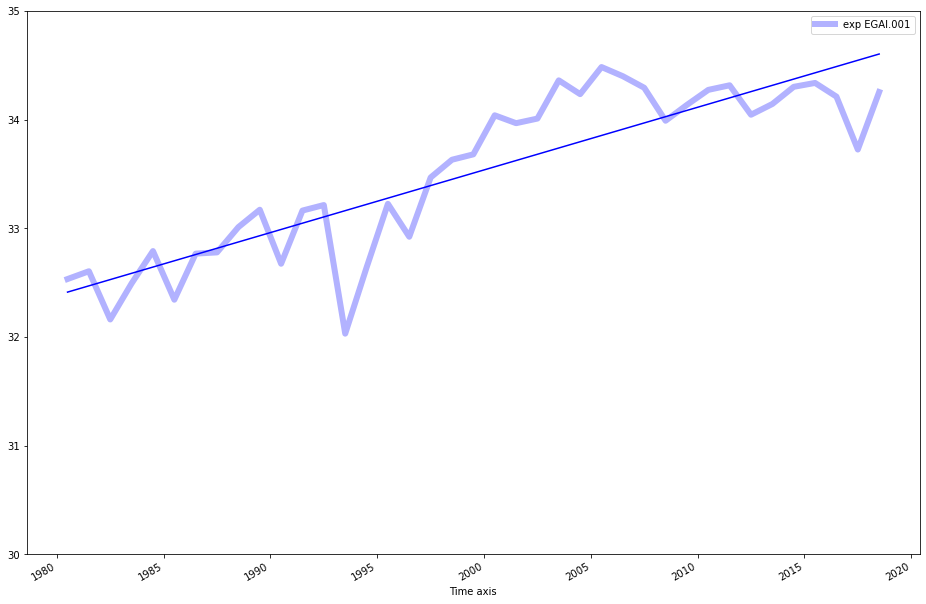

In [10]:
# select data at one example gridpoint

# exp 1
sssGAI    = DAT.data.isel(x=1050,y=1050)
sssGAI_tr = DAT.data.isel(x=1050,y=1050)-DAT.data_dt.isel(x=1050,y=1050)

# plot figure
fig3 = plt.figure(figsize=([16,10]),facecolor='white')
sssGAI.plot(linewidth=6,color='b',alpha=0.3,label='exp '+nexp)
sssGAI_tr.plot(color='b')
plt.ylim(30,35)
plt.legend()
plt.show

# Plot trend map
(stored in DAT.atr)

* load some grid info you need to plot plot maps

In [14]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

* The trend of the data loaded in the variable `DAT` is stored in `DAT.atr` (recall aslo that the data itself, before detrending is stored in `DAT.data`)

In [33]:
# We want to plot the trend:
data2plot = DAT.atr

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

* quick initialisation of some plot parameters for maps and colors

In [43]:
# first define some  default color parameters and grid parameters 
pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[-0.03,0.031,0.001]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.3f'

pltgridparam = li.Fpltgridparamdefaults('GLO')

In [44]:
pltcolparam

{'type': 'TR',
 'levbounds': [-0.03, 0.031, 0.001],
 'cbincr': 4,
 'cbformat': '%.3f',
 'cm_base': 'RdYlBu_r',
 'cu': '#080449',
 'co': '#5b2123',
 'onecohrml': '#F2F2F2',
 'alphaland': 1,
 'landedgeco': '#6E6E6E',
 'rgb': [242, 242, 242]}

* PLOT !

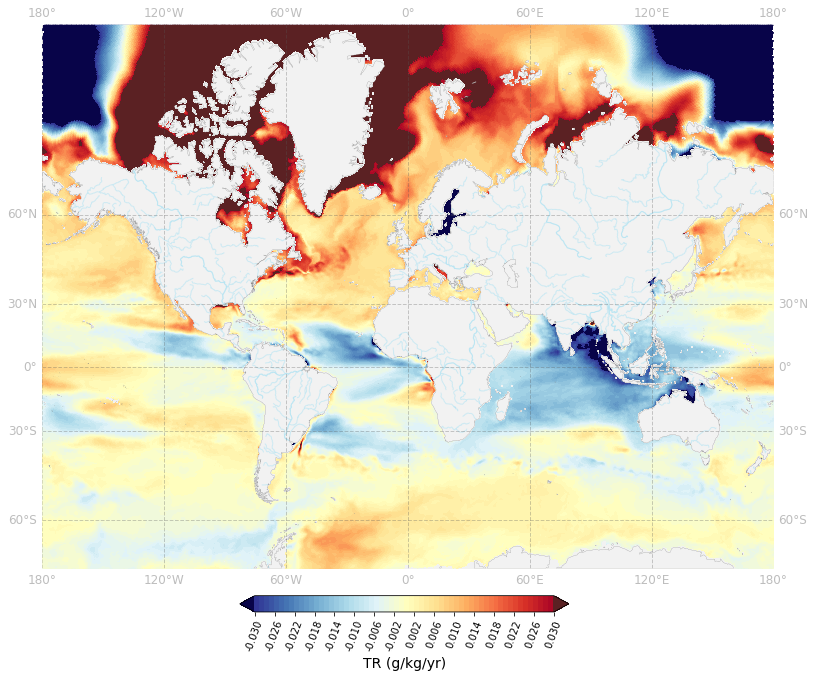

In [45]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD COLORBAR

tlabel=('TR (g/kg/yr)')
cb = li.Faddcolorbar(fig3,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# SAVE TREND in a file for later use:

In [29]:
DAT.saveTR(trno=1,diro=dirdat)

Now if you look in the dirdat directory on jean zay you'll see that a file has been created:

In [31]:
ls  $dirdat

JZ_SSHdtSTD_1y_GAI_1980-2018.nc  JZ_SSSdtSTD_1y_GAI_1997-2007.nc
JZ_SSHdtSTD_1y_S_1980-2018.nc    JZ_SSSdtSTD_1y_GAI_2009-2018.nc
JZ_SSSdtSTD_1m_GAI_2010-2018.nc  JZ_SSSdtSTD_1y_GAI_2010-2018.nc
JZ_SSSdtSTD_1m_S_2010-2018.nc    JZ_SSSdtSTD_1y_GAIa_1997-2007.nc
JZ_SSSdtSTD_1y_AI_1980-2018.nc   JZ_SSSdtSTD_1y_GI_1980-2018.nc
JZ_SSSdtSTD_1y_AI_1997-2007.nc   JZ_SSSdtSTD_1y_GI_2010-2018.nc
JZ_SSSdtSTD_1y_AI_2009-2018.nc   JZ_SSSdtSTD_1y_S_1980-2018.nc
JZ_SSSdtSTD_1y_AI_2010-2018.nc   JZ_SSSdtSTD_1y_S_1997-2007.nc
JZ_SSSdtSTD_1y_GA_1980-2018.nc   JZ_SSSdtSTD_1y_S_2009-2018.nc
JZ_SSSdtSTD_1y_GA_2009-2018.nc   JZ_SSSdtSTD_1y_S_2010-2018.nc
JZ_SSSdtSTD_1y_GA_2010-2018.nc   PROD/
JZ_SSSdtSTD_1y_GAI_1980-2018.nc  TR_EGAI.001_1980-2018.nc


In [32]:
dirdat

'/gpfswork/rech/cli/regi915/DAT/'